# Projet -- FRAUDULENT ACTIVITIES

## I - Loading the data

In [2]:
# Import of librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

# Can be cleared
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [45]:
# Import of dataset of website transaction
df_fraud = pd.read_csv('https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.4%20--%20R%C3%A9duction%20de%20Dimensions%20%26%20Boosting/Projet%20--%20FRAUDULENT%20ACTIVITIES/Datasets/Fraud_Data.csv?token=ANTSBPCLDAXBYCDOFYVOLI2543BXO')

# Import of dataset of IP adresses
df_ip = pd.read_csv('https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.4%20--%20R%C3%A9duction%20de%20Dimensions%20%26%20Boosting/Projet%20--%20FRAUDULENT%20ACTIVITIES/Datasets/IpAddress_to_Country.csv?token=ANTSBPBS57FW6ZRHFUSH5OS543BX2')

## II - Data structure of the dataframe

### A - Exploration of IP adress dataframe

In [4]:
# First exploration
print('Shape:')
print(df_ip.shape)
print()
print('Variable description:')
print(df_ip.info())
print()
print('Head:')
print(df_ip.head())
print()
print('Description:')
print(df_ip.describe(include='all'))
print('Missing values:')
print()
print(df_ip.isna().sum())
print()
print('Count of different values:')
for i in range(len(df_ip.columns)):
    print(df_ip.columns[i],':',len(df_ip[df_ip.columns[i]].unique()))

Shape:
(138846, 3)

Variable description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
lower_bound_ip_address    138846 non-null float64
upper_bound_ip_address    138846 non-null int64
country                   138846 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None

Head:
   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China

Description:
        lower_bound_ip_address  upper_bound_ip_address        country
count             1.388460e+05            1.388460e+05         138846
unique                     NaN                     NaN            235
top                        NaN       

#### Analysis :
3 variables:
- two for description of IP adress
- one for the country
No missing value

In [5]:
# Analysis of country repartition
print(round(df_ip['country'].value_counts()/df_fraud.shape[0]*100,1))

United States                            31.0
Canada                                    4.6
Russian Federation                        4.5
Australia                                 4.2
Germany                                   4.0
United Kingdom                            3.6
Brazil                                    3.2
China                                     2.5
Poland                                    2.0
Japan                                     2.0
Ukraine                                   1.9
France                                    1.9
Netherlands                               1.7
Switzerland                               1.2
Italy                                     1.1
India                                     1.0
Sweden                                    0.9
New Zealand                               0.9
Romania                                   0.8
Austria                                   0.8
Spain                                     0.7
Indonesia                         

In [6]:
# Analysis of country top
print('top 5:',round(df_ip['country'].value_counts()[0:4].sum()/df_fraud.shape[0]*100,1),'%')
print('top 10:',round(df_ip['country'].value_counts()[0:9].sum()/df_fraud.shape[0]*100,1),'%')
print('top 15:',round(df_ip['country'].value_counts()[0:14].sum()/df_fraud.shape[0]*100,1),'%')
print('top 20:',round(df_ip['country'].value_counts()[0:19].sum()/df_fraud.shape[0]*100,1),'%')

top 5: 44.3 %
top 10: 59.5 %
top 15: 68.2 %
top 20: 73.0 %


There is strong top: top 5 is 44% of connexions, top 15 is 68%. US alone is 31%.

### B - Exploration of fraud  dataframe

In [7]:
# First exploration
print('Shape:')
print(df_fraud.shape)
print()
print('Variable description:')
print(df_fraud.info())
print()
print('Head:')
print(df_fraud.head())
print()
print('Description:')
print(df_fraud.describe(include='all'))
print('Missing values:')
print()
print(df_fraud.isna().sum())
print()
print('Count of different values:')
for i in range(len(df_fraud.columns)):
    print(df_fraud.columns[i],':',len(df_fraud[df_fraud.columns[i]].unique()))

Shape:
(151112, 11)

Variable description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None

Head:
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  20

In [8]:
# Analysis of browser repartition
print(round(df_fraud['browser'].value_counts()/df_fraud.shape[0]*100,5))

Chrome     40.65329
IE         24.30449
Safari     16.32365
FireFox    16.28593
Opera       2.43263
Name: browser, dtype: float64


In [9]:
# Analysis of source repartition
print(round(df_fraud['source'].value_counts()/df_fraud.shape[0]*100,5))

SEO       40.11263
Ads       39.62690
Direct    20.26047
Name: source, dtype: float64


In [10]:
# Analysis of sex repartition
print(round(df_fraud['sex'].value_counts()/df_fraud.shape[0]*100,5))

M    58.42885
F    41.57115
Name: sex, dtype: float64


#### Analysis :
11 variables:
- Target is 'class'. Values are 1 or 0: 1 is fraud. It seems there is 9% of Fraud
- Among the descriptive features are:
    - Numeric features:
        - users_id: 151 112 id, the size of dataset. Therefore, all are unique.
        - purchase_value: 122 different values, it would be interesting to anlysis
        - age : 33.1 is mean and 33.0 is median: population centered of 33 year old.
        - ip_adress : 143 512 different adresses, some people are from the same area. Is there a concentration?
    - Categorical features:
        - signup_time: when the buyer registered first. TimeID. Same number as ID number: everybody signup once!
        - purchase_time: when the buyer bought. TimeID. A bit lower than signup_time: not everybody buy something.
        - device_id : 138k. Some people are buying from the same device.
        - source: how did the buyer come to buy. Only 3: 'SEO' (search engine optimisation, 40%), 'Ads' (40%) and 'Direct' (20%).
        - browser: which browser did the buyer use. Only 5 browsers: 'Chrome' (41%), 'IE' (24%), 'Safari' (16%), 'Firefox' (16%), 'Opera' (2%)
        - sex : 58% are male.

Some first remarks:
    - users_id and ip_adress have to be treated like categorical features
    - signup_time is a time code
        
No missing value


## III - Incorporate of the country from the IP adress

In [29]:
# A fonction to have the country in the first dataset, courtesy from Marine Gubler

def find_country(x):
  countries = df_ip[
      (df_ip.lower_bound_ip_address < x) & 
      (df_ip.upper_bound_ip_address > x)
  ].country
  if len(countries) == 0:
    return 'Unknown'
  return countries.values[0]

df_fraud['country'] = df_fraud.ip_address.apply(lambda x: find_country(x))
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [30]:
# Analysis of country
print(round(df_fraud['country'].value_counts()/df_fraud.shape[0]*100,5))

United States                      38.41455
Unknown                            14.53624
China                               7.96628
Japan                               4.83482
United Kingdom                      2.97131
Korea Republic of                   2.75425
Germany                             2.41278
France                              2.09183
Canada                              1.96874
Brazil                              1.95947
Italy                               1.28646
Australia                           1.22029
Netherlands                         1.11176
Russian Federation                  1.06941
India                               0.86691
Taiwan; Republic of China (ROC)     0.81860
Mexico                              0.74183
Sweden                              0.72132
Spain                               0.67963
South Africa                        0.55456
Switzerland                         0.51948
Poland                              0.48242
Argentina                       

In [35]:
# Analysis of country top
print('top 5:',round(df_ip['country'].value_counts()[0:4].sum()/df_fraud.shape[0]*100,1),'%')
print('top 10:',round(df_ip['country'].value_counts()[0:9].sum()/df_fraud.shape[0]*100,1),'%')
print('top 15:',round(df_ip['country'].value_counts()[0:14].sum()/df_fraud.shape[0]*100,1),'%')
print('top 20:',round(df_ip['country'].value_counts()[0:19].sum()/df_fraud.shape[0]*100,1),'%')

top 5: 44.3 %
top 10: 59.5 %
top 15: 68.2 %
top 20: 73.0 %


Analysis of the new columns:
- top 5 sir 44%, top 20 73%
- 15% of countries are missing

In [31]:
# Simplification of the dataset name, as it remains the only one.
df = df_fraud

In [69]:
# Export du CSV

df.to_csv('C:/Users/alexi/Documents/MonGitHub/Projet -- FRAUDULENT ACTIVITIES/Datasets/new_fraud_dataset.csv',index=False)

## IV - Data structure of the dataframe

### Taking the new dataset structure

In [44]:
# It took quite an amount of time to make the country column, so for further analysis we will use this second state dataset

df = pd.read_csv('https://raw.githubusercontent.com/alexisgcomte/Projet----FRAUDULENT-ACTIVITIES/master/Datasets/new_fraud_dataset.csv')

### General Analysis

In [41]:

_ = sns.barplot(x='source', data=df, hue='source')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [46]:
# Conversion by country
_ = sns.catplot(x='country',y='new_user',kind="bar", data=df)
# The proportion of new user is quite the same for every country

ValueError: Could not interpret input 'new_user'

## IV - First Modelling

                Unnamed: 0   user_id  purchase_value       age  ip_address  \
Unnamed: 0        1.000000 -0.002919        0.002794  0.005066    0.000297   
user_id          -0.002919  1.000000        0.002617  0.000611   -0.003144   
purchase_value    0.002794  0.002617        1.000000  0.002370   -0.000328   
age               0.005066  0.000611        0.002370  1.000000    0.001140   
ip_address        0.000297 -0.003144       -0.000328  0.001140    1.000000   
class             0.000935  0.001945        0.001011  0.006624   -0.005208   

                   class  
Unnamed: 0      0.000935  
user_id         0.001945  
purchase_value  0.001011  
age             0.006624  
ip_address     -0.005208  
class           1.000000  


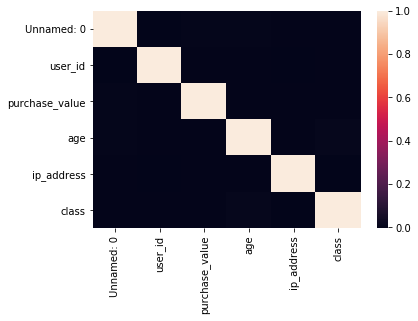

In [47]:
corr = df.corr()
print(corr)
_=sns.heatmap(corr)
# correlation of page visited and conversion

In [51]:
df.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [50]:
target_variable = 'class'
features_list = df.columns.drop(target_variable)
numeric_indices = [1,4]
categorical_indices = [0,2,3]
print(features_list)
print(target_variable)

Index(['Unnamed: 0', 'user_id', 'signup_time', 'purchase_time',
       'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age',
       'ip_address', 'country'],
      dtype='object')
class


In [125]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Variables explicatives : ', X.columns)
print()

Variables explicatives :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [127]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: converted, dtype: int64

In [136]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [137]:
X_train.head()

,country,age,new_user,source,total_pages_visited
17050,US,29,1,Seo,4
260342,US,23,0,Direct,7
278164,UK,33,1,Seo,11
268440,China,25,1,Seo,5
157837,US,40,0,Seo,1


In [138]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train)

Convert pandas DataFrames to numpy arrays...
...Done
[['US' 29 1 'Seo' 4]
 ['US' 23 0 'Direct' 7]
 ['UK' 33 1 'Seo' 11]
 ...
 ['UK' 31 1 'Direct' 6]
 ['UK' 25 1 'Seo' 5]
 ['US' 34 1 'Ads' 3]]


In [141]:
numeric_features = [1,4]
numeric_transformer = StandardScaler()
categorical_features = [0,2,3]
categorical_transformer = OneHotEncoder()
feature_encoder = ColumnTransformer(
transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
]
)
X_train = feature_encoder.fit_transform(X_train)


In [143]:
print(X_train.shape)

(227664, 11)


In [168]:
algo = DecisionTreeClassifier()
params = {'max_depth' : np.arange(5,10),
         'min_samples_leaf' : [1,2,3,4,5],
         'max_features ' : [1,2,3,4,5,6,7,8,9,10]}

classifier =  GridSearchCV(estimator=algo, param_grid= params, scoring='f1', cv = 10,verbose=5,n_jobs=-1)
classifier.fit(X_train, Y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ..... max_depth=1, min_samples_leaf=1, score=0.737, total=   0.8s
[CV] max_depth=1, min_samples_leaf=1 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ..... max_depth=1, min_samples_leaf=1, score=0.705, total=   0.4s
[CV] max_depth=1, min_samples_leaf=1 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] ..... max_depth=1, min_samples_leaf=1, score=0.717, total=   0.9s
[CV] max_depth=1, min_samples_leaf=1 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV] ..... max_depth=1, min_samples_leaf=1, score=0.701, total=   0.7s
[CV] max_depth=1, min_samples_leaf=1 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s


[CV] ..... max_depth=1, min_samples_leaf=1, score=0.706, total=   0.7s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ..... max_depth=1, min_samples_leaf=1, score=0.713, total=   0.6s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ..... max_depth=1, min_samples_leaf=1, score=0.689, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ..... max_depth=1, min_samples_leaf=1, score=0.709, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ..... max_depth=1, min_samples_leaf=1, score=0.719, total=   0.4s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ..... max_depth=1, min_samples_leaf=1, score=0.706, total=   0.3s
[CV] max_depth=1, min_samples_leaf=5 .................................
[CV] ..... max_depth=1, min_samples_leaf=5, score=0.737, total=   0.3s
[CV] max_depth=1, min_samples_leaf=5 .................................
[CV] .

[CV] .... max_depth=2, min_samples_leaf=10, score=0.671, total=   0.2s
[CV] max_depth=2, min_samples_leaf=10 ................................
[CV] .... max_depth=2, min_samples_leaf=10, score=0.634, total=   0.2s
[CV] max_depth=2, min_samples_leaf=10 ................................
[CV] .... max_depth=2, min_samples_leaf=10, score=0.634, total=   0.2s
[CV] max_depth=2, min_samples_leaf=10 ................................
[CV] .... max_depth=2, min_samples_leaf=10, score=0.646, total=   0.3s
[CV] max_depth=2, min_samples_leaf=10 ................................
[CV] .... max_depth=2, min_samples_leaf=10, score=0.611, total=   0.3s
[CV] max_depth=2, min_samples_leaf=10 ................................
[CV] .... max_depth=2, min_samples_leaf=10, score=0.655, total=   0.4s
[CV] max_depth=2, min_samples_leaf=10 ................................
[CV] .... max_depth=2, min_samples_leaf=10, score=0.647, total=   0.4s
[CV] max_depth=2, min_samples_leaf=10 ................................
[CV] .

[CV] ..... max_depth=4, min_samples_leaf=1, score=0.749, total=   1.2s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.741, total=   1.3s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.762, total=   1.1s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.727, total=   0.9s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.727, total=   1.1s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.727, total=   0.8s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.716, total=   0.6s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] .

[CV] ..... max_depth=5, min_samples_leaf=5, score=0.757, total=   0.6s
[CV] max_depth=5, min_samples_leaf=5 .................................
[CV] ..... max_depth=5, min_samples_leaf=5, score=0.735, total=   0.6s
[CV] max_depth=5, min_samples_leaf=10 ................................
[CV] .... max_depth=5, min_samples_leaf=10, score=0.748, total=   0.6s
[CV] max_depth=5, min_samples_leaf=10 ................................
[CV] .... max_depth=5, min_samples_leaf=10, score=0.749, total=   0.6s
[CV] max_depth=5, min_samples_leaf=10 ................................
[CV] .... max_depth=5, min_samples_leaf=10, score=0.763, total=   0.6s
[CV] max_depth=5, min_samples_leaf=10 ................................
[CV] .... max_depth=5, min_samples_leaf=10, score=0.728, total=   0.6s
[CV] max_depth=5, min_samples_leaf=10 ................................
[CV] .... max_depth=5, min_samples_leaf=10, score=0.727, total=   0.6s
[CV] max_depth=5, min_samples_leaf=10 ................................
[CV] .

[CV] .... max_depth=6, min_samples_leaf=20, score=0.764, total=   1.1s
[CV] max_depth=6, min_samples_leaf=20 ................................
[CV] .... max_depth=6, min_samples_leaf=20, score=0.754, total=   1.1s
[CV] max_depth=6, min_samples_leaf=20 ................................
[CV] .... max_depth=6, min_samples_leaf=20, score=0.779, total=   1.4s
[CV] max_depth=6, min_samples_leaf=20 ................................
[CV] .... max_depth=6, min_samples_leaf=20, score=0.745, total=   1.3s
[CV] max_depth=7, min_samples_leaf=1 .................................
[CV] ..... max_depth=7, min_samples_leaf=1, score=0.775, total=   1.5s
[CV] max_depth=7, min_samples_leaf=1 .................................
[CV] ..... max_depth=7, min_samples_leaf=1, score=0.756, total=   1.1s
[CV] max_depth=7, min_samples_leaf=1 .................................
[CV] ..... max_depth=7, min_samples_leaf=1, score=0.786, total=   1.3s
[CV] max_depth=7, min_samples_leaf=1 .................................
[CV] .

[CV] ..... max_depth=8, min_samples_leaf=5, score=0.745, total=   1.5s
[CV] max_depth=8, min_samples_leaf=5 .................................
[CV] ..... max_depth=8, min_samples_leaf=5, score=0.749, total=   2.0s
[CV] max_depth=8, min_samples_leaf=5 .................................
[CV] ..... max_depth=8, min_samples_leaf=5, score=0.748, total=   1.4s
[CV] max_depth=8, min_samples_leaf=5 .................................
[CV] ..... max_depth=8, min_samples_leaf=5, score=0.750, total=   1.1s
[CV] max_depth=8, min_samples_leaf=5 .................................
[CV] ..... max_depth=8, min_samples_leaf=5, score=0.782, total=   1.1s
[CV] max_depth=8, min_samples_leaf=5 .................................
[CV] ..... max_depth=8, min_samples_leaf=5, score=0.746, total=   1.2s
[CV] max_depth=8, min_samples_leaf=10 ................................
[CV] .... max_depth=8, min_samples_leaf=10, score=0.756, total=   1.0s
[CV] max_depth=8, min_samples_leaf=10 ................................
[CV] .

[CV] .... max_depth=9, min_samples_leaf=20, score=0.783, total=   1.1s
[CV] max_depth=9, min_samples_leaf=20 ................................
[CV] .... max_depth=9, min_samples_leaf=20, score=0.748, total=   1.0s
[CV] max_depth=9, min_samples_leaf=20 ................................
[CV] .... max_depth=9, min_samples_leaf=20, score=0.746, total=   1.0s
[CV] max_depth=9, min_samples_leaf=20 ................................
[CV] .... max_depth=9, min_samples_leaf=20, score=0.751, total=   1.1s
[CV] max_depth=9, min_samples_leaf=20 ................................
[CV] .... max_depth=9, min_samples_leaf=20, score=0.751, total=   1.0s
[CV] max_depth=9, min_samples_leaf=20 ................................
[CV] .... max_depth=9, min_samples_leaf=20, score=0.748, total=   1.0s
[CV] max_depth=9, min_samples_leaf=20 ................................
[CV] .... max_depth=9, min_samples_leaf=20, score=0.775, total=   1.1s
[CV] max_depth=9, min_samples_leaf=20 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  4.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 5, 10, 20]},

In [172]:
classifier.best_params_

{'max_depth': 7, 'min_samples_leaf': 1}

In [179]:
classifier.best_estimator_.score(X_test, Y_test)

0.9855400941738702

In [180]:
classifier.best_estimator_.score(X_train, Y_train)

0.986348302761965

In [181]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [183]:
print('f1 score de train:', f1_score(Y_train_pred, Y_train))
print('f1 score de test:', f1_score(Y_test_pred, Y_test))

f1 score de train: 0.7675044883303412
f1 score de test: 0.7580596565230492


## TEST PIPELINE

In [149]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = feature_encoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-1.27912164  0.63598611  0.          0.          0.          1.
   0.          1.          1.          0.          0.        ]
 [ 0.05165043  0.03803388  0.          0.          0.          1.
   0.          1.          0.          0.          1.        ]
 [-0.3112874  -0.26094223  0.          0.          0.          1.
   1.          0.          0.          0.          1.        ]
 [-0.67422524 -0.26094223  0.          1.          0.          0.
   0.          1.          1.          0.          0.        ]
 [ 1.62438106  0.63598611  0.          0.          0.          1.
   1.          0.          1.          0.          0.        ]]


In [150]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



## Performance assessment

In [151]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7652606956915415
f1-score on test set :  0.7580596565230492


In [152]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[219482    852]
 [  2259   5071]]

Confusion matrix on test set : 
[[54855   211]
 [  592  1258]]



## Train best classifier on all data and use it to make predictions on X_without_labels

In [157]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

C:\Users\alexi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
# Read data without labels
data_without_labels = pd.read_csv('C:/Users/alexi/Downloads/conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country','age','new_user','source','total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ['US' 32 1 'Ads' 6]
 ['China' 25 0 'Seo' 3]]


In [159]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = feature_encoder.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.3112874   3.32677112  0.          0.          1.          0.
   1.          0.          0.          0.          1.        ]
 [-1.03716308  0.03803388  0.          0.          1.          0.
   0.          1.          0.          1.          0.        ]
 [ 0.17262971 -1.15787057  1.          0.          0.          0.
   0.          1.          0.          0.          1.        ]
 [ 0.17262971  0.33701     0.          0.          0.          1.
   0.          1.          1.          0.          0.        ]
 [-0.67422524 -0.55991834  1.          0.          0.          0.
   1.          0.          0.          0.          1.        ]]


In [160]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-baseline
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('C:/Users/alexi/Downloads/conversion_data_test_LesPingouinsv{}.csv'.format(iteration), index=False)
iteration +=1

In [171]:
iteration

1